# Predicting House Prices using Regression Models

### by Eko Saputro

This [dataset](https://github.com/ekosaputro09/Data-Science-Project/blob/master/House%20Pricing/kc_house_data.csv?raw=true) contains house sale prices for King County, Seattle, from May 2014 until May 2015 which consist information about the location of the house, other aspects such as square feet, basement, and also the price. 

In this project, we want to make a model which can give us a good prediction on the price of the house based on other variables.
We are going to use Linear Regression to see if it can give us a good accuracy.

A good accuracy depends on what sort of data we are working with. In case of credit risk data an accuracy of 80% may not be good enough but for NLP data it would be good. So, we can't actually define a "Good Accuracy", but anything above 85% is good.
Our goal is to achieve an accuracy score above 85%.

## Data Preprocessing

First, we have to import libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

We also import the dataset and check if the data has any duplicates or missing values

In [2]:
def importData(path):
    
    data = pd.read_csv(path)
    print("Raw data has %d Observations and %d Columns" %data.shape)

    if data.duplicated().sum() != 0:
        print("Duplicated data :", data.duplicated().sum)
        data = data.drop_duplicates()
        print("After drop duplicates, data has %d Observations and %d Columns" %data.shape)
    else :
        print("Duplicated data :", data.duplicated().sum())
    
    if data.isnull().any().sum() != 0:
        print("Data contains missing value")
    else :
        print("Data does not contains missing value")
        
    return data

In [3]:
data = importData('kc_house_data.csv')

Raw data has 21613 Observations and 21 Columns
Duplicated data : 0
Data does not contains missing value


## Exploratory Data Analysis

We use head and describe functions to get information from our data

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


If we look at bedrooms column, we can see that maximum bedroom of a house can up to 33 rooms. It seems to be a massive house.
We will know more about it as we continue our progress.

Next, we want to see the correlation between variables using some visualization. We want to know which is the most common bedrooms number.

<function seaborn.utils.despine>

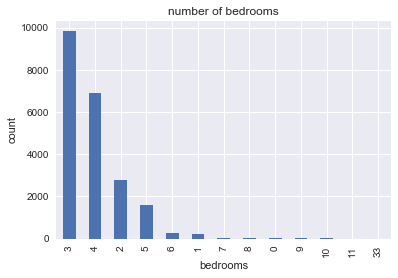

In [6]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine

It turns out that a house with 3 bedrooms is the most commonly sold, followed by 4 bedroom houses. We want to see the location of that houses using longitude and latitude data. And by using jointplot we can see the placement of the houses.

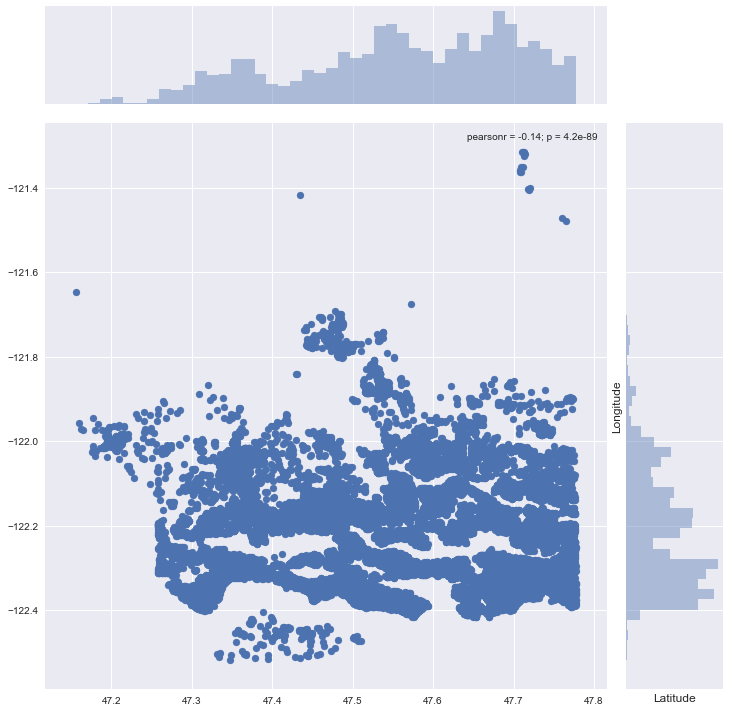

<function seaborn.utils.despine>

In [7]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data['lat'].values, y=data['long'].values, size=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()
sns.despine

As we can see, the most commonly sold houses are located between 47.6 and 47.7 on the latitude and between -122.4 and -122.2 on the longitude.

Next, we want to know what factors are affecting the price of the house. We start with the area of the house.

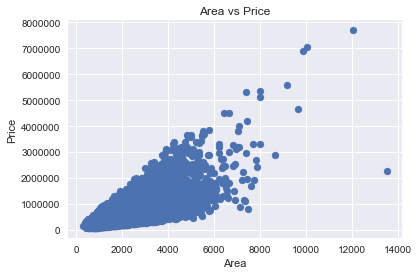

In [8]:
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')

It seems that there is a linear relationship between them. We can see that as the living area increase, the price got increase too except for the highest living area which sold for very less. Maybe there is another factor or the data probably wrong.

Let's see the relationship between location and the price.

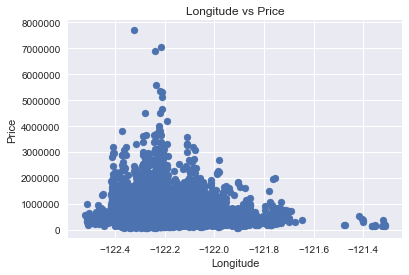

In [9]:
plt.scatter(data['long'], data['price'])
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.title('Longitude vs Price')

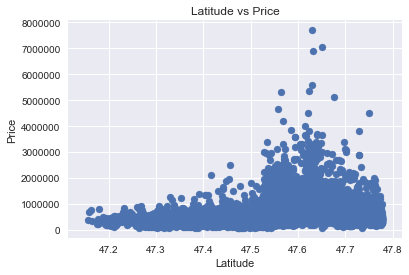

In [10]:
plt.scatter(data['lat'], data['price'])
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Latitude vs Price')

As we mentioned earlier, the most commonly sold houses are located between 47.6 and 47.7 on the latitude and between -122.4 and -122.2 on the longitude. It turns out that in that location also has the highest price of house sales. The location around 47.2 Latitude and -121.4 Longitude has relatively low selling prices.

Now let's see how the bedrooms affect the price.

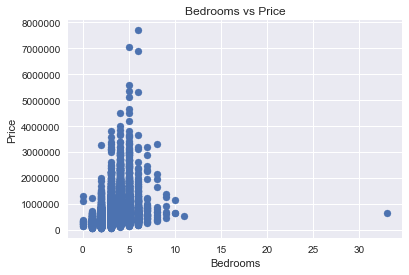

In [11]:
plt.scatter(data['bedrooms'], data['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')

We can see that more bedrooms do not always increase the price. In fact, the 6 bedrooms house has the highest selling price. The 33 bedrooms house looks like its just a wrong data because how can a house with so many bedrooms which will be a massive house, sold with very low price.

How about a house with the basement? Is it affects the price?

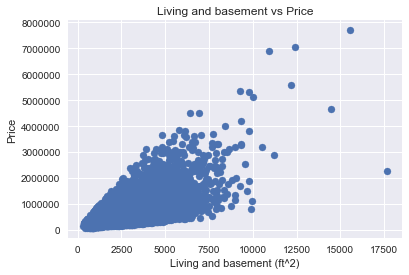

In [12]:
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.xlabel('Living and basement (ft^2)')
plt.ylabel('Price')
plt.title('Living and basement vs Price')

Not much different from the house area that we plot earlier, still has the linearity relationship.

And how about the floor?

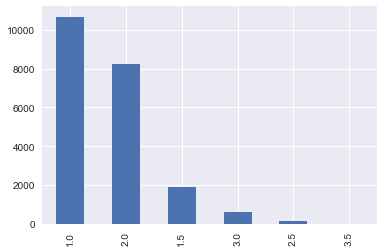

In [13]:
data['floors'].value_counts().plot(kind='bar')

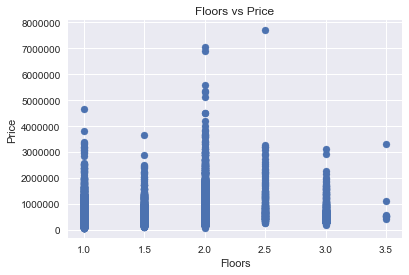

In [14]:
plt.scatter(data['floors'], data['price'])
plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Floors vs Price')

We can see that the most commonly sold is a house with only 1 floor. A house with 2.5 floors is not commonly sold but has the highest on the selling price.

Before we going to process the data, we have to make some changes first. We want to see the data which bedrooms number is 33.

In [15]:
data[data['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


It seems that the data is wrong, maybe a typo. Here we change the bedrooms number to 3.

In [16]:
data.set_value(15870, 'bedrooms', 3)
data[data['id']==2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,3,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Next, we change the date into binary value so it doesn't influence too much. If the year is 2014 we sign it to 1 and for other value, we sign it to 0.

In [17]:
data['date'] = [1 if values == 2014 else 0 for values in data.date]

## Input - Output Split

As we know it, we will use 'price' column as our target data or output data. We remove 'id' column from our input data because it is unique and we can't get any information from there.

In [18]:
output_data = data['price']

input_data = data.drop(['price', 'id'], axis=1)

Let's take a look at our input data

In [19]:
input_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Train - Test Split

Here we split our data into train and test data with 90:10 proportion. With x is our input data and y is our output data.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, 
                                                    test_size=0.1, random_state=123)

Let's take a look at our train data

In [22]:
x_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21356,0,4,2.5,2280,5000,2.0,0,0,3,7,2280,0,2006,0,98038,47.3593,-122.037,2910,5000
17220,0,3,1.0,1160,7491,1.0,0,0,4,6,1160,0,1917,0,98177,47.7024,-122.359,1800,2267
13336,0,3,1.0,1350,4800,1.5,0,0,3,7,1350,0,1928,0,98116,47.5749,-122.412,1360,4800
704,0,2,1.0,880,9000,1.0,0,0,3,5,880,0,1928,0,98188,47.4672,-122.291,1410,10000
13277,0,3,2.5,2430,7613,2.0,0,0,4,8,2430,0,1986,0,98058,47.4383,-122.135,2440,8342


Here is the size comparison of our train and test data

In [23]:
print("Train data size :", x_train.shape)
print("Test data size :", x_test.shape)

Train data size : (19451, 19)
Test data size : (2162, 19)


## Model 

We want to create a model that can predict the price of the house based on other factors like bedrooms, basement, floors, etc.

Here we use Linear Regression.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linreg = LinearRegression()

In [26]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linreg.score(x_train, y_train)

0.69895982467955009

In [28]:
linreg.score(x_test, y_test)

0.70983667112027338

It turns out that the accuracy score we had from Linear Regression is about 71%. It is lower than our goal of 85%.

We use another model to achieve that and try with KNN for Regression.

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knr = KNeighborsRegressor()

In [31]:
knr.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
knr.score(x_train, y_train)

0.68538631278910778

In [33]:
knr.score(x_test, y_test)

0.49129952871949989

The accuracy we had from KNN is not better than the Linear Regression model, so we have to try another model.

Next, we try Random Forest for Regression.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
ranfor = RandomForestRegressor()

In [36]:
ranfor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [37]:
ranfor.score(x_train, y_train)

0.97507990369960851

In [38]:
ranfor.score(x_test, y_test)

0.86657488647658021

The accuracy score we had from Random Forest is about 88%. We had a better accuracy with Random Forest and we have achieved our goal. 

There is one model we want to try about, to see whether it can give us a better accuracy. It is Gradient Boosting Regression.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
gbr = GradientBoostingRegressor(n_estimators=400, max_depth=5, 
                                min_samples_split=2, learning_rate=0.1, loss='ls')

In [41]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [42]:
gbr.score(x_train, y_train)

0.97107031515404374

In [43]:
gbr.score(x_test, y_test)

0.91057524379056187

It turns out that the accuracy score we had from Gradient Boosting Regression is the best so far. We had an accuracy score about 91%, it's fantastic. 

And also, we have achieved our goal to get an accuracy score above 85%.

This project is based on the following :
 * https://medium.com/towards-data-science/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
 * http://bricdata.science/kingcohouseprices